In [1]:
import omicverse as ov
ov.utils.ov_plot_set()
from matplotlib import rcParams

# 设置全局字体为Arial
rcParams['font.family'] = 'Arial'

2023-08-28 15:33:33.584728: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-28 15:33:34.057465: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-08-28 15:33:34.057533: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-08-28 15:33:34.057539: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
!gpustat

/mnt/data/env/pyomic/lib/python3.8/site-packages/blessed/terminal.py:183: UserWarning: Failed to setupterm(kind='xterm-color'): setupterm: could not find terminfo database
  warnings.warn(msg)
clever                         Mon Aug 28 15:33:34 2023  525.105.17
[0] NVIDIA GeForce RTX 2080 Ti | 39°C,   0 % |  2189 / 11264 MB | zehuazeng(1184M) zehuazeng(576M) gdm(18M) gdm(90M) ustbjump(50M) ustbjump(9M)


In [4]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
adata = sc.read('data/Pancreas.h5ad')
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [6]:
adata=ov.pp.qc(adata,
              tresh={'mito_perc': 0.2, 'nUMIs': 500, 'detected_genes': 250})
adata

Calculate QC metrics
End calculation of QC metrics.
Original cell number: 3696
Begin of post doublets removal and QC plot
Running Scrublet
filtered out 12261 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.35
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 56.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.4%
    Scrublet finished (0:00:02)
Cells retained after scrublet: 3688, 8 removed.
End of post doublets removal and QC plots.
Filters application (seurat or mads)
Lower tresho

AnnData object with n_obs × n_vars = 3688 × 15735
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'highly_variable_genes', 'mt', 'n_cells'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'scrublet'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [7]:
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=3000,)
adata

Begin robust gene identification
After filtration, 15735/15735 genes are kept. Among 15735 genes, 15735 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['Ghrl']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
End of size normalization: shiftlog and HVGs selection pearson


AnnData object with n_obs × n_vars = 3688 × 15735
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'highly_variable_genes', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'scrublet', 'log1p', 'hvg'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'counts'
    obsp: 'connectivities', 'distances'

In [8]:
adata3=adata.copy()
import scanpy as sc
#sc.pp.highly_variable_genes(adata3, n_top_genes=3000, flavor="seurat_v3")
adata3=adata3[:,adata3.var['highly_variable_features']==True]
adata3

View of AnnData object with n_obs × n_vars = 3688 × 3000
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'highly_variable_genes', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'scrublet', 'log1p', 'hvg'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'counts'
    obsp: 'connectivities', 'distances'

In [9]:
ov.pp.scale(adata3)
ov.pp.pca(adata3,layer='scaled',n_pcs=50)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [10]:
sc.pp.neighbors(adata3, n_neighbors=15, n_pcs=50,
               use_rep='scaled|original|X_pca')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [11]:
sc.tl.umap(adata3)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


In [12]:
adata3.obsm["X_mde"] = ov.utils.mde(adata3.obsm["scaled|original|X_pca"])

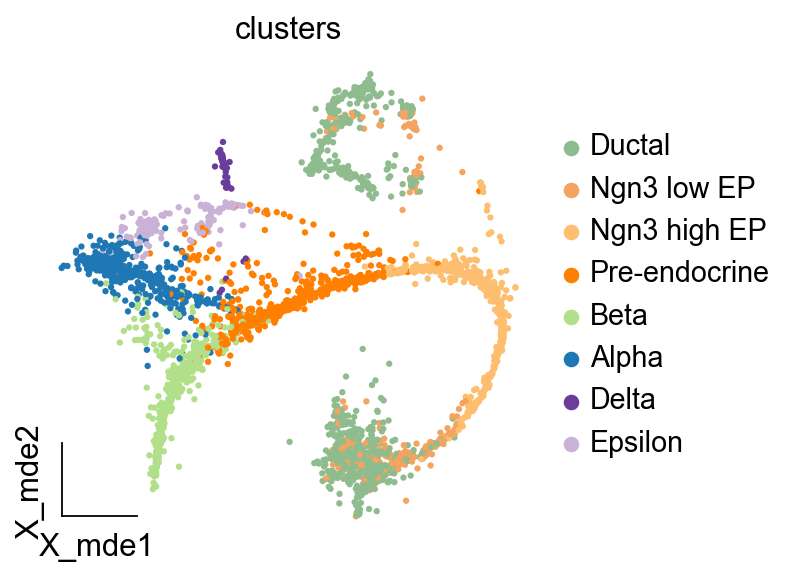

In [13]:
ov.utils.embedding(adata3,basis='X_mde', color=['clusters'], 
               cmap='PuRd',legend_loc='right margin',frameon='small')

In [14]:
import Epiverse as ev
ev.utils.lsi(adata3, n_components=20, n_iter=15)

In [122]:
import scltnn
ltnn_obj=scltnn.scLTNN(adata3,basis='X_lsi',input_dim=20,)

In [123]:
ltnn_obj.ANNmodel_load('model/model_20.h5')
ltnn_obj.cal_paga(use_rep='scaled|original|X_pca',resolution=2)
ltnn_obj.cal_model_time()

......calculate paga
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 22 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
......predict model_time


In [124]:
ltnn_obj.cal_exp_gene_value()

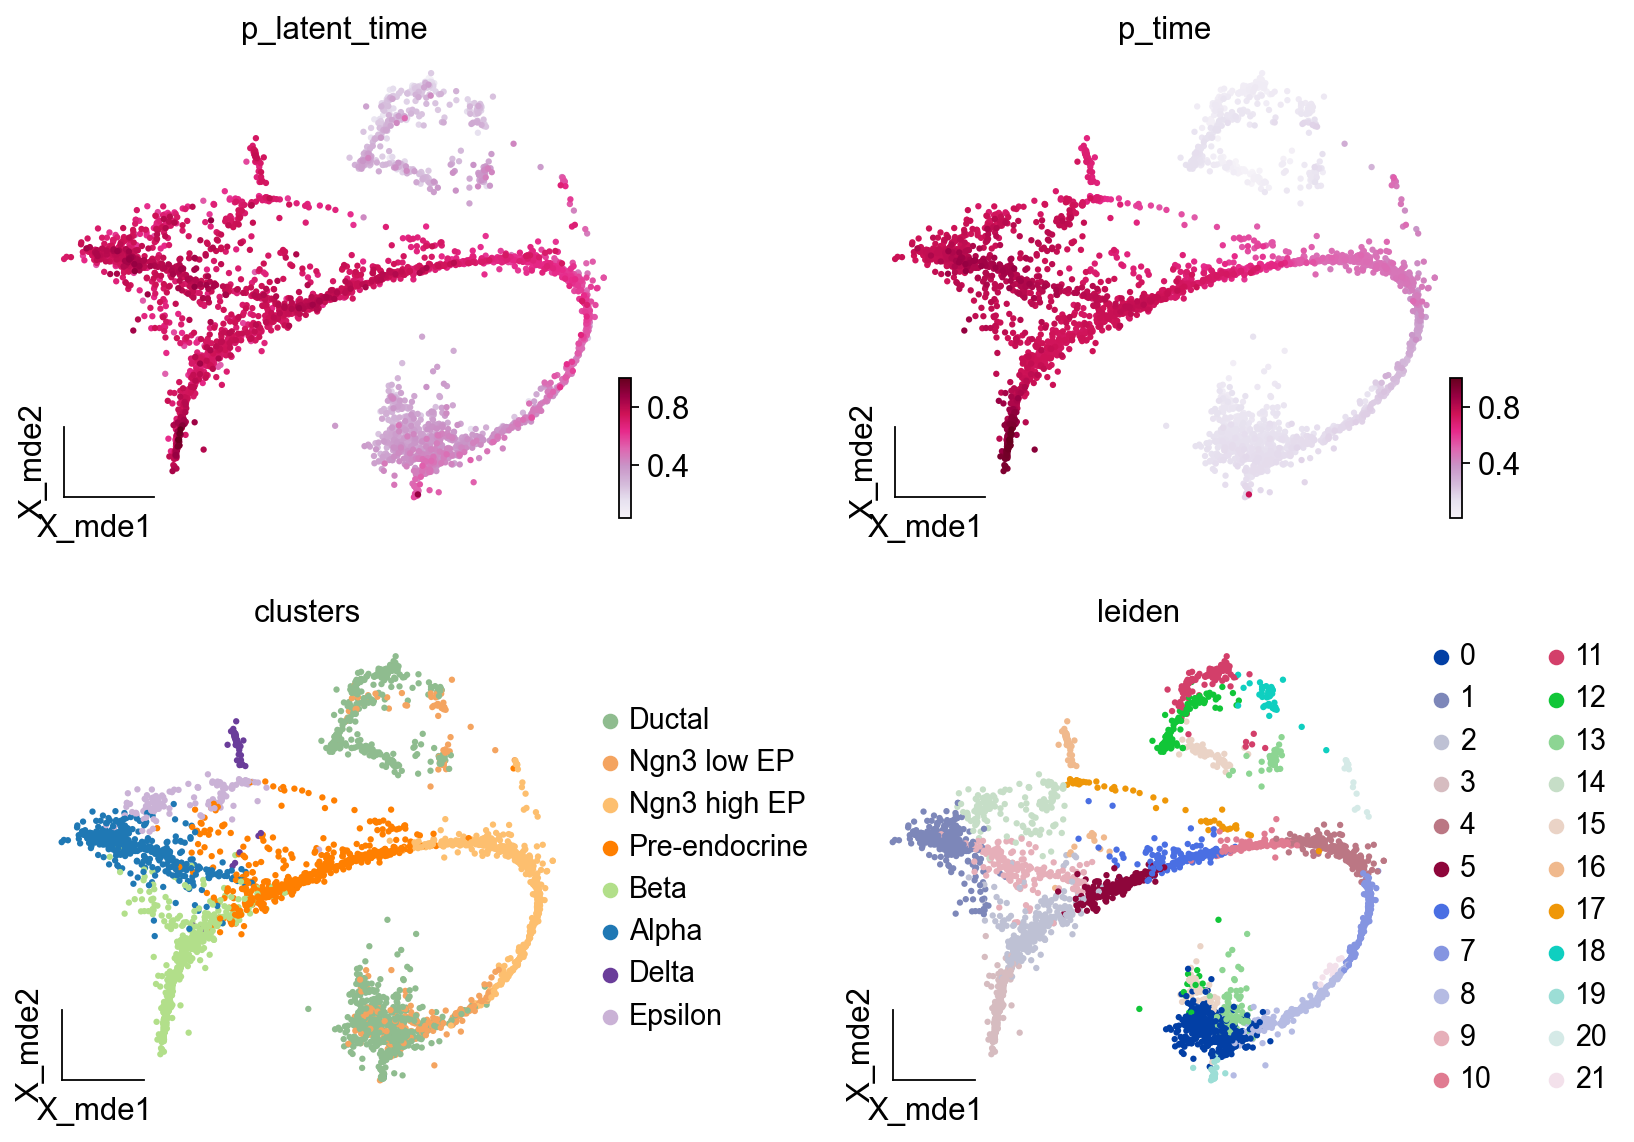

In [125]:
ov.utils.embedding(adata3,basis='X_mde', color=['p_latent_time','p_time','clusters','leiden'], 
               cmap='PuRd',legend_loc='right margin',frameon='small',ncols=2,wspace=0.4)

In [129]:
ltnn_obj.cal_dpt_pseudotime(leiden_range_start=0.1,leiden_range_mid=0.2,leiden_range_end=0.05)

......calculate dpt_pseudotime
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99880654 0.99221    0.9867425  0.9785878  0.973239
     0.96828544 0.96134734 0.9573104  0.9536495  0.95056605 0.94721144
     0.93862814 0.93734187 0.92321223]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)
......leiden_start: ['15', '11', '18', '12']
......leiden_middle ['7', '20', '4', '10', '6', '17']
......leiden_end ['9', '3', '5', '1']


--> added 'pos', the PAGA positions (adata.uns['paga'])


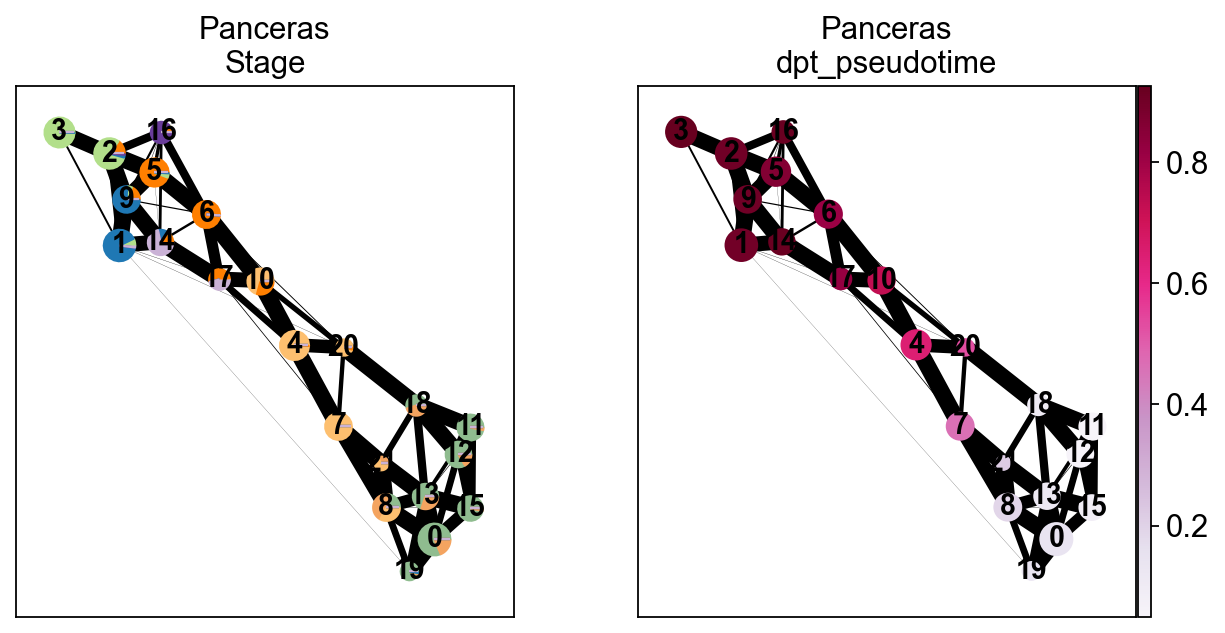

In [130]:
sc.pl.paga(ltnn_obj.adata, color=['clusters','dpt_pseudotime'],cmap='PuRd',
          title=['Panceras\nStage','Panceras\ndpt_pseudotime'],)
          #save='_fig3_pancreas.png')

In [131]:
ltnn_obj.ANN(batch_size=30,n_epochs=200,verbose=0)

......ANN


ANN model: 100%|██████████| 200/200 [00:18<00:00, 10.63it/s, val loss, val mae=0.00126, 0.00126]


In [132]:
ltnn_obj.cal_distrubute()
ltnn_obj.cal_scLTNN_time()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 16.3225] [loc=0.582 scale=0.353]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 16.0462] [loc=0.000 scale=0.582]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 16.0462] [loc=-67108864.000 scale=67108864.000]
[distfit] >INFO> [dweibull  ] [0.05 sec] [RSS: 6.82953] [loc=0.471 scale=0.387]


......Dweibull analysis


[distfit] >INFO> [t         ] [0.26 sec] [RSS: 16.3227] [loc=0.582 scale=0.353]
[distfit] >INFO> [genextreme] [0.09 sec] [RSS: 10.4093] [loc=0.565 scale=0.391]
[distfit] >INFO> [gamma     ] [0.08 sec] [RSS: 16.4325] [loc=-4.948 scale=0.024]
[distfit] >INFO> [lognorm   ] [0.16 sec] [RSS: 16.3819] [loc=-65.545 scale=66.125]
[distfit] >INFO> [beta      ] [0.08 sec] [RSS: 10.5268] [loc=-0.029 scale=1.029]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 12.2331] [loc=0.000 scale=1.000]
[distfit] >INFO> [loggamma  ] [0.01 sec] [RSS: 9.51868] [loc=0.971 scale=0.014]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 11.4298] [loc=0.556 scale=0.338]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 12.215] [loc=-0.032 scale=0.587]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 12.215] [loc=-67108864.032 scale=67108864.000]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 8.4304] [loc=0.639 scale=0.

......Norm analysis


[distfit] >INFO> [t         ] [0.26 sec] [RSS: 11.4299] [loc=0.556 scale=0.338]
[distfit] >INFO> [genextreme] [0.09 sec] [RSS: 9.05918] [loc=0.529 scale=0.404]
[distfit] >INFO> [gamma     ] [0.08 sec] [RSS: 11.4614] [loc=-6.500 scale=0.016]
[distfit] >INFO> [lognorm   ] [0.17 sec] [RSS: 11.45] [loc=-54.643 scale=55.199]
[distfit] >INFO> [beta      ] [0.12 sec] [RSS: 7.06276] [loc=-0.033 scale=1.045]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 8.41825] [loc=-0.032 scale=1.044]
[distfit] >INFO> [loggamma  ] [0.02 sec] [RSS: 8.42743] [loc=0.990 scale=0.011]
[distfit] >INFO> Compute confidence intervals [parametric]


......calculate scLTNN time


--> added 'pos', the PAGA positions (adata.uns['paga'])


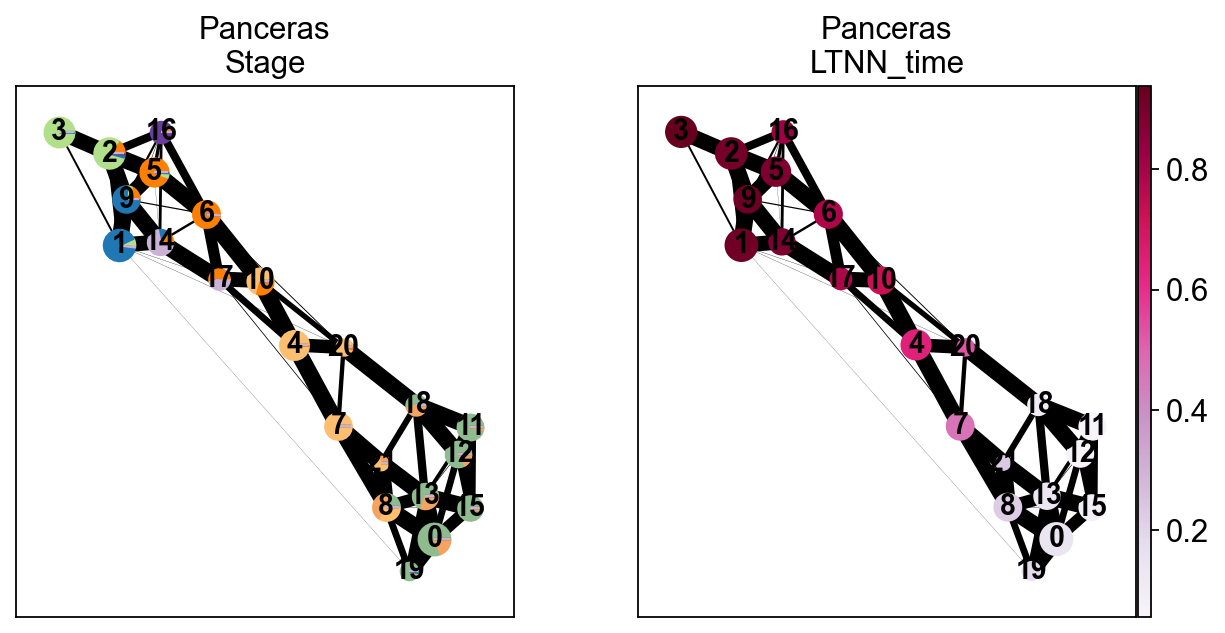

In [133]:
sc.pl.paga(ltnn_obj.adata, color=['clusters','LTNN_time'],cmap='PuRd',
          title=['Panceras\nStage','Panceras\nLTNN_time'],)
          #save='_fig3_pancreas.png')

In [134]:
import scvelo as scv
ltnn_obj.adata.uns['paga_graph']=ltnn_obj.adata.obsp['connectivities']

In [135]:
scv.tl.paga(ltnn_obj.adata, groups='clusters',vkey='paga',use_time_prior='LTNN_time')

running PAGA using priors: ['LTNN_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


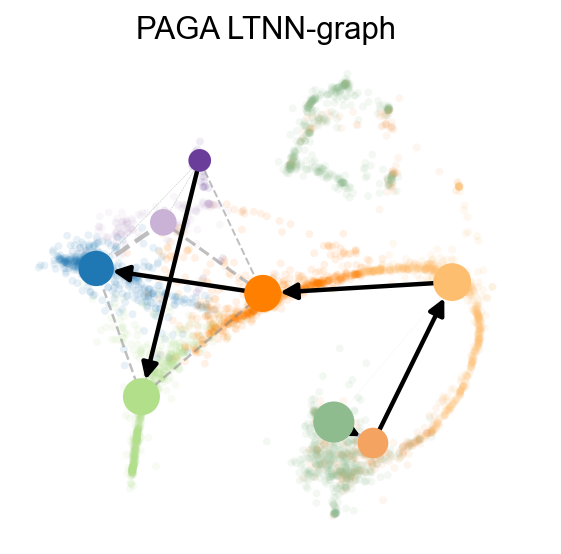

In [136]:
#fig, ax = plt.subplots(figsize=(3,3))
ax=scv.pl.paga(ltnn_obj.adata, basis='mde', size=50, alpha=.1,title='PAGA LTNN-graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
plt.savefig("figures/fig3/mouse_paga_graph.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/mouse_paga_graph.pdf",dpi=300,bbox_inches = 'tight')

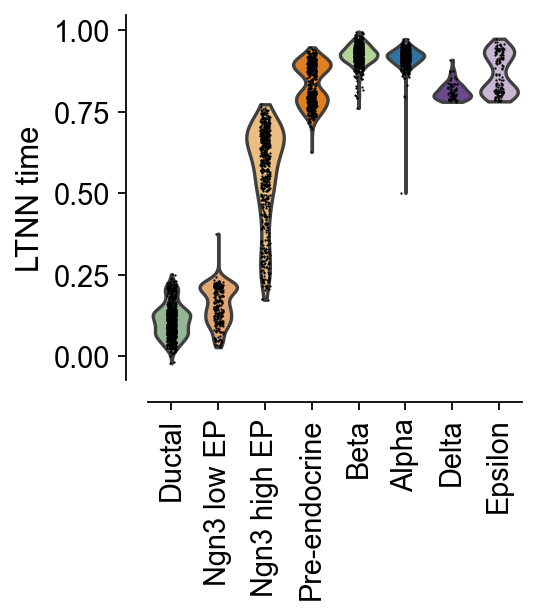

In [137]:
fig, ax = plt.subplots(figsize=(3,3))
fontsize=13
sc.pl.violin(ltnn_obj.adata, keys=["LTNN_time"], ax=ax,
             groupby="clusters", rotation=90,show=False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#ax.set_xlabel('Latent time',fontsize=fontsize)
ax.set_ylabel('LTNN time',fontsize=fontsize+1)
plt.savefig("figures/fig3/mouse_violin.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/mouse_violin.pdf",dpi=300,bbox_inches = 'tight')


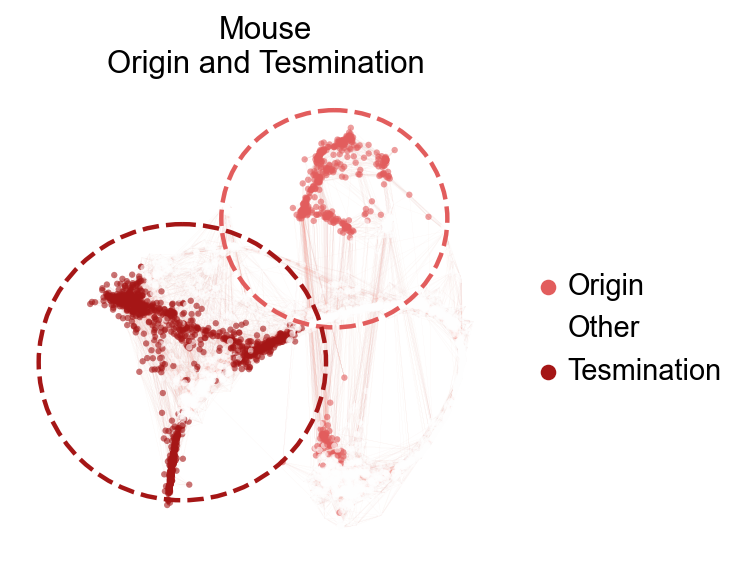

In [140]:
fig,ax=scltnn.models.plot_origin_tesmination(ltnn_obj.adata, basis='X_mde',origin=['12', '11', '18', '15'],
                               tesmination=['9', '3', '5', '1'],
                        edges=True,edges_color='#f4897b',edges_width=0.01,
                       title='Mouse\nOrigin and Tesmination',alpha=0.6,
                       frameon=False,legend_fontsize=13,figsize=(4,4))
plt.savefig("figures/fig3/mouse_ot.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/mouse_ot.pdf",dpi=300,bbox_inches = 'tight')

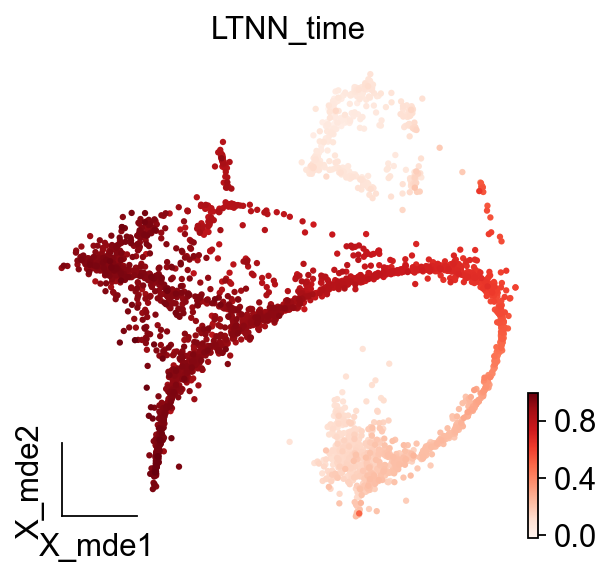

In [141]:
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(ltnn_obj.adata,basis='X_mde', color=['LTNN_time'], 
               cmap='Reds',legend_loc='right margin',frameon='small',
                   ncols=2,wspace=0.4,show=False,ax=ax)
plt.savefig("figures/fig3/mouse_umap_ltnn.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/mouse_umap_ltnn.pdf",dpi=300,bbox_inches = 'tight')


/mnt/data/env/pyomic/lib/python3.8/site-packages/omicverse/utils/_scatterplot.py:417: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


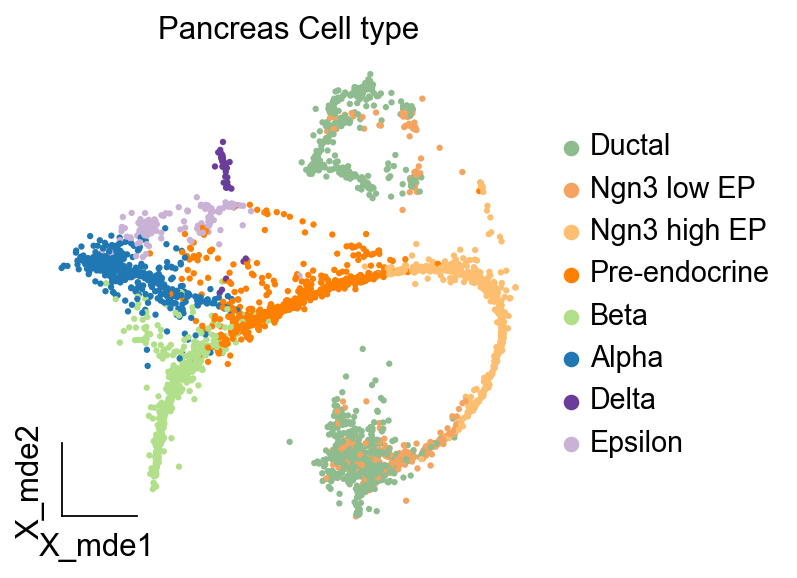

In [161]:
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(ltnn_obj.adata,basis='X_mde', color=['clusters'], 
               cmap='Reds',legend_loc='right margin',frameon='small',
                   ncols=2,wspace=0.4,show=False,ax=ax)
plt.title('Pancreas Cell type',fontsize=14)
plt.savefig("figures/fig3/mouse_umap_celltype.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/mouse_umap_celltype.pdf",dpi=300,bbox_inches = 'tight')


In [143]:
import scvelo as scv
ltnn_obj.adata.uns['paga_graph']=ltnn_obj.adata.obsp['connectivities']

In [144]:
scv.tl.paga(ltnn_obj.adata, groups='leiden',vkey='paga',use_time_prior='LTNN_time')

running PAGA using priors: ['LTNN_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


--> added 'pos', the PAGA positions (adata.uns['paga'])


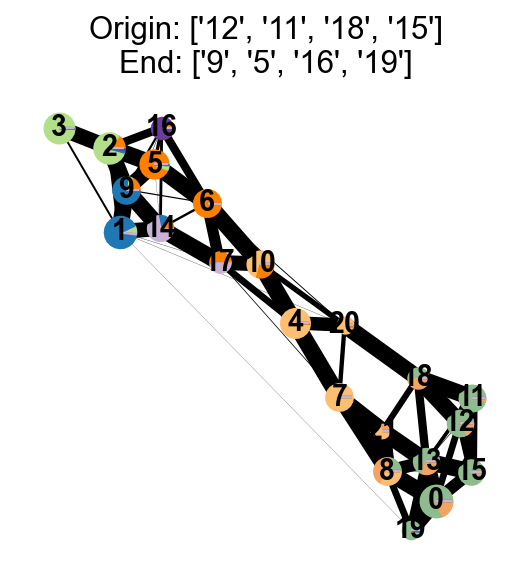

In [145]:
fig, ax = plt.subplots(figsize=(4,4))
origin=['12', '11', '18', '15']
tesmination=['9', '5', '16', '19']
sc.pl.paga(ltnn_obj.adata, color=['clusters'],cmap='PuRd',
          title=[f'Origin: {origin}\nEnd: {tesmination}'],show=False,ax=ax,frameon=False,)
plt.savefig("figures/fig3/mouse_paga_leiden.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/mouse_paga_leiden.pdf",dpi=300,bbox_inches = 'tight')


--> added 'pos', the PAGA positions (adata.uns['paga'])


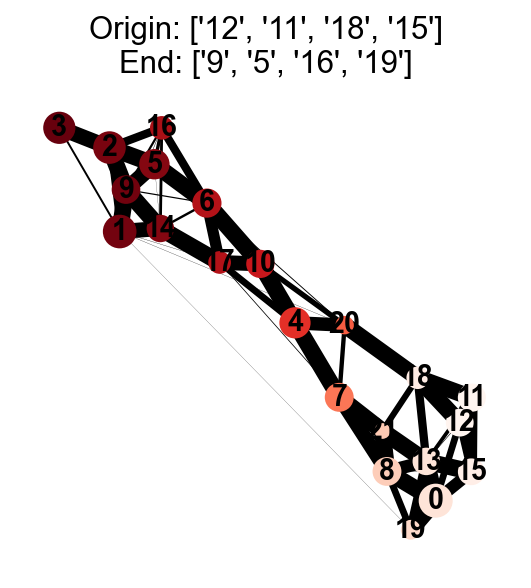

In [146]:
fig, ax = plt.subplots(figsize=(4,4))
sc.pl.paga(ltnn_obj.adata, color=['LTNN_time'],cmap='Reds',colorbar=False,
          title=[f'Origin: {origin}\nEnd: {tesmination}'],show=False,ax=ax,frameon=False,)
plt.savefig("figures/fig3/mouse_paga_ltnn.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/mouse_paga_ltnn.pdf",dpi=300,bbox_inches = 'tight')


In [155]:
from cellrank.tl.kernels import PseudotimeKernel
import scvelo as scv
ptk=PseudotimeKernel(ltnn_obj.adata,time_key='dpt_pseudotime')
ptk

<PseudotimeKernel>

In [156]:
ptk.compute_transition_matrix()
ptk.compute_projection(basis="mde")

Computing transition matrix based on `dpt_pseudotime`


  0%|          | 0/3688 [00:00<?, ?cell/s]

    Finish (0:00:01)
Projecting transition matrix onto `mde`
Adding `adata.obsm['T_fwd_mde']`
    Finish (0:00:00)


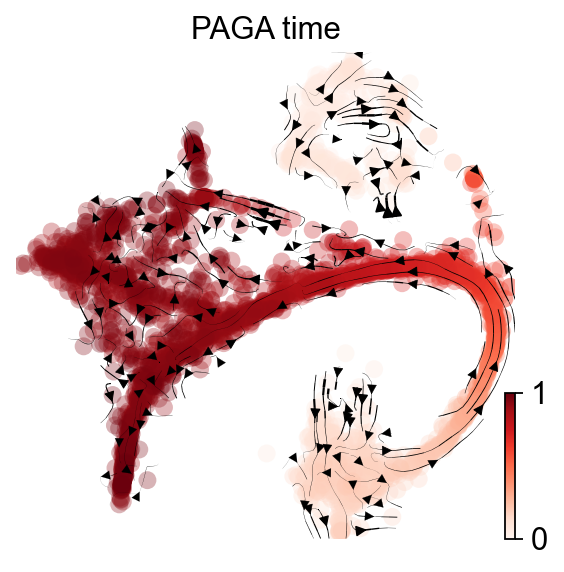

In [157]:
ax=scv.pl.velocity_embedding_stream(
    ltnn_obj.adata,  vkey="T_fwd", basis="mde",color='dpt_pseudotime',
    title='PAGA time',
    legend_loc='right margin',cmap='Reds',show=False
) 
ax.grid(False)
plt.savefig('figures/fig3/mouse_velo_paga.png',dpi=300,bbox_inches='tight')

In [158]:
from cellrank.tl.kernels import PseudotimeKernel
ptk=PseudotimeKernel(ltnn_obj.adata,time_key='LTNN_time')
ptk

<PseudotimeKernel>

In [159]:
ptk.compute_transition_matrix()
ptk.compute_projection(basis="mde")

Computing transition matrix based on `LTNN_time`


  0%|          | 0/3688 [00:00<?, ?cell/s]

    Finish (0:00:01)
Projecting transition matrix onto `mde`
Adding `adata.obsm['T_fwd_mde']`
    Finish (0:00:00)


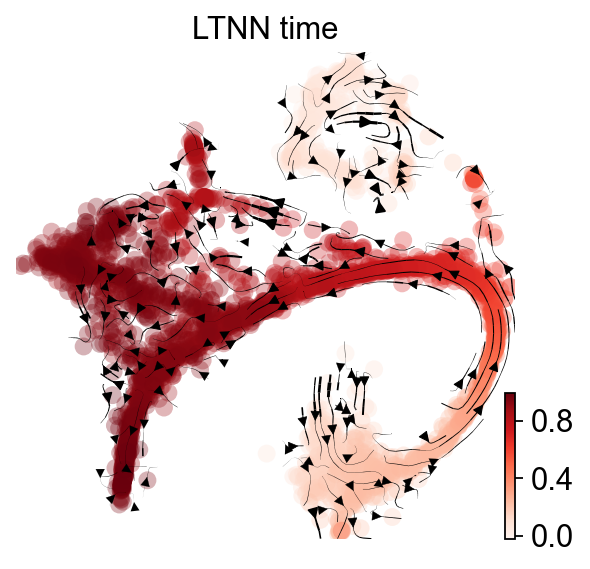

In [160]:
ax=scv.pl.velocity_embedding_stream(
    ltnn_obj.adata,  vkey="T_fwd", basis="mde",color='LTNN_time',
    title='LTNN time',
    legend_loc='right margin',cmap='Reds',show=False
) 
ax.grid(False)
plt.savefig('figures/fig3/mouse_velo_ltnn.png',dpi=300,bbox_inches='tight')

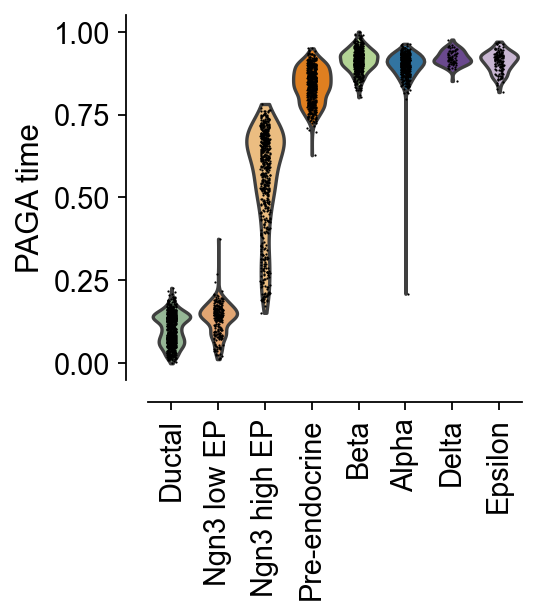

In [154]:
fig, ax = plt.subplots(figsize=(3,3))
fontsize=13
sc.pl.violin(ltnn_obj.adata, keys=["dpt_pseudotime"], ax=ax,
             groupby="clusters", rotation=90,show=False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#ax.set_xlabel('Latent time',fontsize=fontsize)
ax.set_ylabel('PAGA time',fontsize=fontsize+1)
plt.savefig("figures/fig3/mouse_violin_paga.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/mouse_violin_paga.pdf",dpi=300,bbox_inches = 'tight')
